In [ ]:
!conda update --all
!conda install -c conda-forge -y notebook=4.2.3
import sys
!conda install --yes --prefix {sys.prefix} pandas
!conda install --yes --prefix {sys.prefix} sklearn-contrib-lightning
!conda install --yes --prefix {sys.prefix} seaborn
!conda install --yes --prefix {sys.prefix} cartopy


In [248]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

In [249]:
sns.set(color_codes=True)
sns.set_palette('colorblind')
%matplotlib inline

In [250]:
# path = '/tmp/data/world-happiness-report'   # path to local data
path = 'c:\\sg\world-happiness-data-analysis\dataset'  # path to data in local
# dat2015 = pd.read_csv(pd.read_csv("dataset/2015.csv"))
dat2015 = pd.read_csv(os.path.join(path, '2015.csv'))
dat2016 = pd.read_csv(os.path.join(path, '2016.csv'))
dat2017 = pd.read_csv(os.path.join(path, '2017.csv'))
dat2018 = pd.read_csv(os.path.join(path, '2018.csv'))
dat2019 = pd.read_csv(os.path.join(path, '2019.csv'))

In [251]:
dat2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [252]:
dat2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [253]:
dat2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [254]:
# 2017 data does not contain region, we create it based on the 2016 data:

dat2017 = pd.merge(dat2017, dat2016.loc[:, ['Country', 'Region']], on='Country')
dat2017.rename(columns={'Happiness.Rank': 'Happiness Rank',
                       'Happiness.Score': 'Happiness Score',
                       'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                       'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                       'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual'}, inplace=True)
dat2017.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe


In [255]:
dat2018.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [256]:
# 2018 data does not contain region, we create it based on the 2016 data:

dat2018 = pd.merge(dat2018, dat2016.loc[:, ['Country', 'Region']], on="Country")
dat2018.rename(columns={'Overall rank': 'Happiness Rank',
                       'Score': 'Happiness Score',
                       'GDP per capita': 'Economy (GDP per Capita)',
                       'Healthy life expectancy': 'Health (Life Expectancy)',
                       'Perceptions of corruption': 'Trust (Government Corruption)',
                        'Social support': 'Family',
                        'Freedom to make life choices': 'Freedom',
                        'Dystopia.Residual': 'Dystopia Residual'},
               inplace=True)
dat2018.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Western Europe


In [257]:
dat2019.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [258]:
# 2019 data does not contain region, we create it based on the 2016 data:

dat2019 = pd.merge(dat2019, dat2016.loc[:, ['Country', 'Region']], on="Country")
dat2019.rename(columns={'Overall rank': 'Happiness Rank',
                       'Score': 'Happiness Score',
                       'GDP per capita': 'Economy (GDP per Capita)',
                       'Healthy life expectancy': 'Health (Life Expectancy)',
                       'Perceptions of corruption': 'Trust (Government Corruption)',
                        'Social support': 'Family',
                        'Freedom to make life choices': 'Freedom',
                        'Dystopia.Residual': 'Dystopia Residual'},
               inplace=True)
dat2019.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


In [259]:
(any(dat2015.duplicated('Country').values)
    or any(dat2016.duplicated('Country').values)
    or any(dat2017.duplicated('Country').values)
    or any(dat2018.duplicated('Country').values)
    or any(dat2019.duplicated('Country').values))

False

In [260]:
dat2015.set_index('Country', inplace=True)
dat2016.set_index('Country', inplace=True)
dat2017.set_index('Country', inplace=True)
dat2018.set_index('Country', inplace=True)
dat2019.set_index('Country', inplace=True)

In [261]:
shp_filename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
# shp_filename = "c:\\sg\world-happiness-data-analysis\ne_110m_admin_0_countries.shp"
assert os.path.exists(shp_filename)
shp_reader = shpreader.Reader(shp_filename)

In [156]:
# Fix country names
country_name_map = {'Bosnia and Herz.': 'Bosnia and Herzegovina',
                    'Czechia': 'Czech Republic',
                    'Congo': 'Congo (Brazzaville)',
                    'Dem. Rep. Congo': 'Congo (Kinshasa)',
                    'Dominican Rep.': 'Dominican Republic',
                    'Greenland': 'Denmark',
                    'Palestine': 'Palestinian Territories',
                    'Somaliland': 'Somalia',
                   'United States of America': 'United States'}

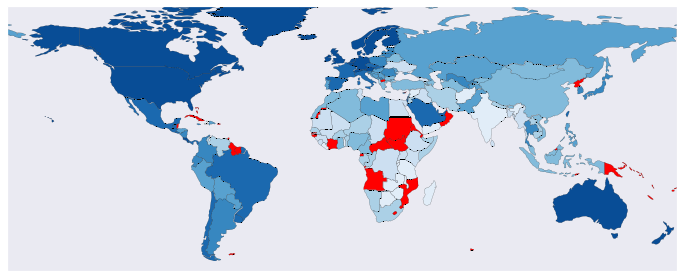

In [270]:
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.add_feature(cartopy.feature.OCEAN)
ax.set_extent([-150, 60, -25, 60])

map_colors = sns.color_palette('Blues_r', 8)
# Visualize this year data
data_year = dat2019
for country in shp_reader.records():
    if country.attributes['NAME'] in country_name_map:
        name = country_name_map[country.attributes['NAME']]
    else:
        name = country.attributes['NAME']
    n=country
    if name in data_year.index:
        try:
          ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=map_colors[int(data_year.loc[name, "Happiness Rank"] / (data_year['Happiness Rank'].max() + 1) * len(map_colors))],
                            alpha = 1.00, linewidth =0.15, edgecolor = "black", label=n.attributes['ADM0_A3']) 
        except Exception as e:
          #print(e)
          import shapely.wkt as wkt
          from shapely.geometry import MultiPolygon
          list_str_polygons = [str(n.geometry)]
          c = MultiPolygon(map(wkt.loads, list_str_polygons))
          ax.add_geometries(c, ccrs.PlateCarree(), facecolor=map_colors[int(data_year.loc[name, "Happiness Rank"] / (data_year['Happiness Rank'].max() + 1) * len(map_colors))],
                            alpha = 1.00, linewidth =0.15, edgecolor = "black", label=n.attributes['ADM0_A3']) 

    else:
        try:
          ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=(1, 0, 0),
                            alpha = 1.00, linewidth =0.15, edgecolor = "black", 
                            label=n.attributes['ADM0_A3']) 
        except Exception as e:
          #print(e)
          import shapely.wkt as wkt
          from shapely.geometry import MultiPolygon
          list_str_polygons = [str(n.geometry)]
          c = MultiPolygon(map(wkt.loads, list_str_polygons))
          ax.add_geometries(c, ccrs.PlateCarree(), facecolor=(1, 0, 0), alpha = 1.00, linewidth =0.15, edgecolor = "black", label=n.attributes['ADM0_A3']) 


Plotting the histograms of the yearly happiness scores on top of each other shows a small shift towards more happiness from 2015 to 2017.

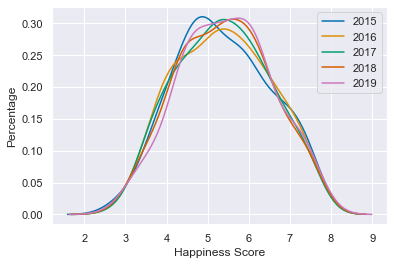

In [274]:
sns.kdeplot(dat2015['Happiness Score'], label='2015')
sns.kdeplot(dat2016['Happiness Score'], label='2016')
sns.kdeplot(dat2017['Happiness Score'], label='2017')
sns.kdeplot(dat2018['Happiness Score'], label='2018')
sns.kdeplot(dat2019['Happiness Score'], label='2019')

plt.xlabel('Happiness Score')
plt.ylabel('Percentage')
plt.legend()
plt.show()


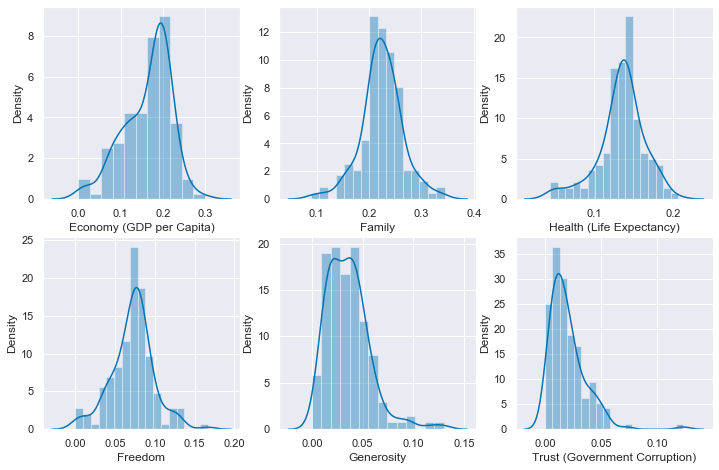

In [313]:
import warnings
warnings.filterwarnings("ignore")

happiness_factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Generosity', 'Trust (Government Corruption)'
           ]

def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sns.distplot(data[column])

plt.figure(figsize=(12,12))
plot_columns_on_grid(dat2019, happiness_factors, (3, 3))


Some of the distributions look like we have at least two distinct groups of countries. For instance the Health data has the majority clustered around 0.7 but also a second group of countries around 0.3.

Happiness change from 2015 to 2019

In [314]:
dat2019['Happiness Change'] = dat2019['Happiness Score'] - dat2015['Happiness Score']
dat2019['Happiness Change'].describe()


count    145.000000
mean       0.076779
std        0.500587
min       -2.103000
25%       -0.207000
50%        0.032000
75%        0.363000
max        1.543000
Name: Happiness Change, dtype: float64

Find the country with the biggest improvement of happiness

Benin improves the most

In [315]:
country_max_chg = dat2019['Happiness Change'].idxmax()
dat2019.loc[country_max_chg]


Happiness Rank                                  102
Happiness Score                               4.883
Economy (GDP per Capita)                  0.0804833
Family                                    0.0894942
Health (Life Expectancy)                  0.0813025
Freedom                                   0.0714725
Generosity                                0.0358386
Trust (Government Corruption)              0.016793
Region                           Sub-Saharan Africa
Happiness Change                              1.543
Cluster                                           2
Name: Benin, dtype: object

See the changes in the individual parameters

In [282]:
dat2019.loc[country_max_chg, happiness_factors] - dat2015.loc[country_max_chg, happiness_factors]


Economy (GDP per Capita)         0.10635
Family                           0.08314
Health (Life Expectancy)          0.0779
Freedom                          -0.1355
Generosity                       -0.0076
Trust (Government Corruption)     0.0019
Name: Benin, dtype: object

Find the country with the biggest loss of happiness

In [284]:
country_min_chg = dat2019['Happiness Change'].idxmin()
dat2017.loc[country_min_chg]

Happiness Rank                                            82
Happiness Score                                         5.25
Whisker.high                                         5.37003
Whisker.low                                          5.12997
Economy (GDP per Capita)                             1.12843
Family                                               1.43134
Health (Life Expectancy)                            0.617144
Freedom                                             0.153997
Generosity                                         0.0650196
Trust (Government Corruption)                      0.0644911
Dystopia Residual                                    1.78946
Region                           Latin America and Caribbean
Name: Venezuela, dtype: object

See the changes in the individual parameters

In [285]:
dat2019.loc[country_min_chg, happiness_factors] - dat2015.loc[country_min_chg, happiness_factors]


Economy (GDP per Capita)        -0.08424
Family                           0.17104
Health (Life Expectancy)         0.08448
Freedom                         -0.27508
Generosity                       0.00559
Trust (Government Corruption)   -0.06369
Name: Venezuela, dtype: object

Happiness by region

In [287]:
by_region = dat2019.groupby('Region')
by_region[['Happiness Score', 'Happiness Change'] + happiness_factors].mean().sort_values(by='Happiness Score', ascending=False)


,Happiness Score,Happiness Change,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
Region,,,,,,,,
Australia and New Zealand,7.267500,-0.017500,1.337500,1.552500,1.031000,0.571000,0.331000,0.335000
North America,7.085000,-0.188000,1.399000,1.481000,0.956500,0.519000,0.282500,0.218000
Western Europe,6.898400,0.159050,1.362050,1.483900,1.013850,0.482550,0.221050,0.221200
Latin America and Caribbean,5.942550,-0.194750,0.908950,1.332850,0.816800,0.438500,0.142600,0.074850
Eastern Asia,5.688833,0.062667,1.235167,1.333500,0.953333,0.372167,0.172833,0.119667
Central and Eastern Europe,5.571786,0.227214,1.022429,1.340393,0.808500,0.357964,0.141214,0.062750
Southeastern Asia,5.273667,-0.043778,0.930000,1.246444,0.745333,0.543778,0.301778,0.123444
Middle East and Northern Africa,5.237000,-0.093789,1.059053,1.148684,0.751053,0.317947,0.153474,0.105000
Southern Asia,4.526857,-0.054000,0.650286,0.986857,0.617000,0.386286,0.234714,0.093429


Factors contributing to happiness
Influence of the 6 factors Economy, Family, etc. on happiness depending on regions. Nomalize the factors to the total happiness score.
The economy and family are by far the most important contributors to the total happiness score. Generosity and Government Trust are the least important factors.

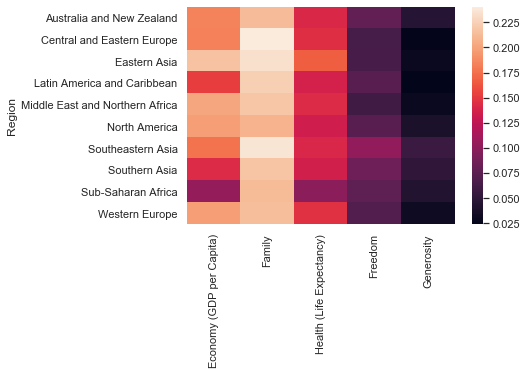

In [288]:
sns.heatmap(by_region[happiness_factors[:-1]].mean().div(by_region['Happiness Score'].mean(), axis='index'))


Cluster analysis

In the original data, the happiness factors such as Economy, Family, etc. sum up to the happiness Score. Consequently, a countries with high happiness score also tend to have high factors. To analyze how the influence of economy on happiness varies between countries, we first normalize the factors using the total happiness score.


In [289]:
dat2019_norm = dat2019
dat2019_norm[happiness_factors] = dat2019_norm[happiness_factors].div(dat2019['Happiness Score'].values, axis=0)


Cluster analysis based on the happiness factors using the k-means method

In [316]:
cluster_n = 3
k_means = KMeans(init='k-means++', n_clusters=cluster_n, n_init=10)
cluster_labels = k_means.fit_predict(dat2019_norm[happiness_factors[:-1]])


Plot distributions of the factors for each cluster:



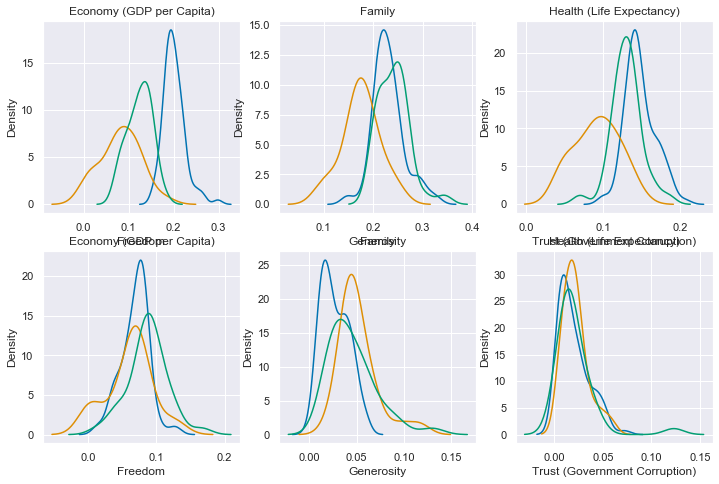

In [317]:
plt.figure(figsize=(12,12))
for i, factor in enumerate(happiness_factors):
    ax = plt.subplot(3, 3, i+1)
    for cluster in range(cluster_n):
        sns.kdeplot(dat2019_norm.loc[cluster_labels == cluster, factor], label=cluster)
        ax.set_title(factor)


Compare happiness score distribution for the clusters:


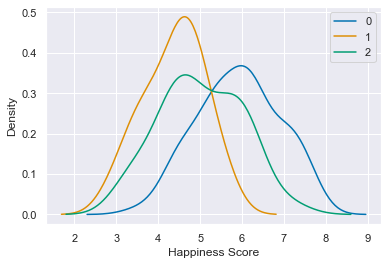

In [318]:
for cluster in range(cluster_n):
    sns.kdeplot(dat2019.loc[cluster_labels == cluster, 'Happiness Score'], label=cluster)
plt.legend()
plt.show()

There is a big difference between the happiness score distributions of the clusters.

In [319]:
dat2019['Cluster'] = cluster_labels


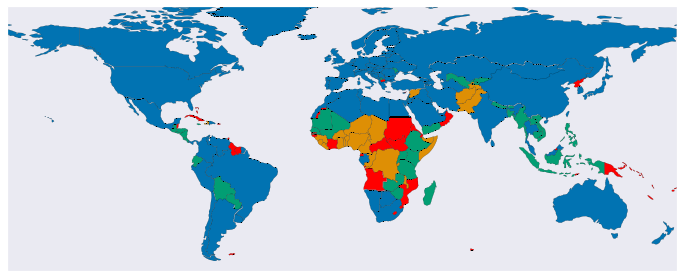

In [320]:
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.add_feature(cartopy.feature.OCEAN)
ax.set_extent([-150, 60, -25, 60])

for country in shp_reader.records():
    if country.attributes['NAME'] in country_name_map:
        name = country_name_map[country.attributes['NAME']]
    else:
        name = country.attributes['NAME']
    n = country
    if name in dat2019.index:
        try:
          ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=sns.color_palette()[dat2019.loc[name, 'Cluster']],
                            alpha = 1.00, linewidth =0.15, edgecolor = "black", label=n.attributes['ADM0_A3']) 
        except Exception as e:
          #print(e)
          import shapely.wkt as wkt
          from shapely.geometry import MultiPolygon
          list_str_polygons = [str(n.geometry)]
          c = MultiPolygon(map(wkt.loads, list_str_polygons))
          ax.add_geometries(c, ccrs.PlateCarree(), facecolor=sns.color_palette()[dat2019.loc[name, 'Cluster']],
                            alpha = 1.00, linewidth =0.15, edgecolor = "black", label=n.attributes['ADM0_A3']) 
    else:
        try:
          ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=(1, 0, 0),
                            alpha = 1.00, linewidth =0.15, edgecolor = "black", 
                            label=n.attributes['ADM0_A3']) 
        except Exception as e:
          #print(e)
          import shapely.wkt as wkt
          from shapely.geometry import MultiPolygon
          list_str_polygons = [str(n.geometry)]
          c = MultiPolygon(map(wkt.loads, list_str_polygons))
          ax.add_geometries(c, ccrs.PlateCarree(), facecolor=(1, 0, 0), alpha = 1.00, linewidth =0.15, edgecolor = "black", label=n.attributes['ADM0_A3']) 



This map visualizes coutries clustered by the factors contributing to happiness.

Bright red colored countries are not part of the analysis.